In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

## Key
data = Original dataset, no changes

data_1 = Edited for modeling; Dropped id, member_id, emp_title, url, desc, title, zip_code (because last two digits missing), create dummy variables for categorical data, convert variables with dates to distance in months to January 2017 (for consistency and use in modeling)

data_10 = Drop variables with over 50% missing, fill in rest with mean

In [2]:
#Change r"C:\Users\Miles Strother\Desktop\Kaggle\LCD\loan.csv" 
data = pd.read_csv(r"C:\Users\Miles Strother\Desktop\Kaggle\LCD\loan.csv", low_memory=False)
pd.set_option('display.max_columns', 1000)

## Clean the data

In [182]:
#Drop variables not needed for modeling
data_1 = data.drop(['member_id', 'emp_title', 'url', 'desc', 'title', 'zip_code'], axis=1)

In [183]:
#Split categorical data into dummy variables
categories = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'verification_status_joint']
categories_no_loan = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'verification_status_joint']
data_dummies = pd.get_dummies(data_1[categories])
pd.set_option('display.max_columns', 1000)

In [184]:
#Drop categorical variables and add dummy variables to data_1
data_2 = pd.concat([data_1, data_dummies], axis=1, join_axes=[data_1.index])
data_3 = data_2.drop(data_2[categories_no_loan], axis=1)

In [185]:
#Create a function to a change variable with dates to distance in months to January 2017
date_variables = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
def date_func(dataframe, date_variable, new_list):
    for x in date_variable:
        if x[:3] == 'Jan':
            y,z = x.split('-')
            a = y.replace(y[:3], '12')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'Feb':
            y,z = x.split('-')
            a = y.replace(y[:3], '11')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'Mar':
            y,z = x.split('-')
            a = y.replace(y[:3], '10')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'Apr':
            y,z = x.split('-')
            a = y.replace(y[:3], '9')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'May':
            y,z = x.split('-')
            a = y.replace(y[:3], '8')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'Jun':
            y,z = x.split('-')
            a = y.replace(y[:3], '7')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'Jul':
            y,z = x.split('-')
            a = y.replace(y[:3], '6')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'Aug':
            y,z = x.split('-')
            a = y.replace(y[:3], '5')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'Sep':
            y,z = x.split('-')
            a = y.replace(y[:3], '4')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'Oct':
            y,z = x.split('-')
            a = y.replace(y[:3], '3')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'Nov':
            y,z = x.split('-')
            a = y.replace(y[:3], '2')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        elif x[:3] == 'Dec':
            y,z = x.split('-')
            a = y.replace(y[:3], '1')
            b = ((2016 - int(z[-5:]))*12)
            c = int(a) + b
            new_list.append(c)
        else:
            a = x.replace(x, '0')
            new_list.append(a)

In [186]:
#Change variables with dates to distance in months to January 2017
issue_list = []
data_3['issue_d'] = data_3['issue_d'].replace(np.nan, ' ', regex=True)
date_func(data_3, data_3['issue_d'], issue_list)
data_3['issue_date'] = np.asarray(issue_list)
data_4 = data_3.drop(['issue_d'], axis=1)

In [187]:
cr_list = []
data_4['earliest_cr_line'] = data_4['earliest_cr_line'].replace(np.nan, ' ', regex=True)
date_func(data_4, data_4['earliest_cr_line'], cr_list)
data_4['earliest_credit_line'] = np.asarray(cr_list)
data_5 = data_4.drop(['earliest_cr_line'], axis=1)

In [188]:
last_list = []
data_5['last_pymnt_d'] = data_5['last_pymnt_d'].replace(np.nan, ' ', regex=True)
date_func(data_5, data_5['last_pymnt_d'], last_list)
data_5['last_payment'] = np.asarray(last_list)
data_6 = data_5.drop(['last_pymnt_d'], axis=1)

In [189]:
next_list = []
data_6['next_pymnt_d'] = data_6['next_pymnt_d'].replace(np.nan, ' ', regex=True)
date_func(data_6, data_6['next_pymnt_d'], next_list)
data_6['next_payment'] = np.asarray(next_list)
data_7 = data_6.drop(['next_pymnt_d'], axis=1)

In [190]:
last_credit_list = []
data_7['last_credit_pull_d'] = data_7['last_credit_pull_d'].replace(np.nan, ' ', regex=True)
date_func(data_7, data_7['last_credit_pull_d'], last_credit_list)
data_7['last_credit'] = np.asarray(last_credit_list)
data_8 = data_7.drop(['last_credit_pull_d'], axis=1)

In [191]:
#Drop all variables with more than 50% missing values
large_missing = []
for column in data_8:
    h = data_8[column]
    count = h.isnull().sum()
    if (887379 - count)/887379 <= .5:
        large_missing.append(column)
    else:
        pass

In [192]:
data_9 = data_8.drop(large_missing, axis=1)

In [193]:
#This takes too long to run, so I'm going to comment it out and instead drop missing values.  Ideally, I would fill with mean,
#but the computer I'm using can't handle this code
#data_10 = data_9.fillna(data_9.mean())

In [194]:
data_10 = data_9.dropna(axis=0)

In [195]:
#Get rid of loan status dummies used for visualization but not for modeling 
loan_status_list = ['loan_status_Charged Off', 'loan_status_Current', 'loan_status_Default', 'loan_status_Does not meet the credit policy. Status:Charged Off', 'loan_status_Does not meet the credit policy. Status:Fully Paid', 'loan_status_Fully Paid', 'loan_status_In Grace Period', 'loan_status_Issued', 'loan_status_Late (16-30 days)', 'loan_status_Late (31-120 days)']
data_18 = data_10.drop(loan_status_list, axis=1)

## Visualize the Data

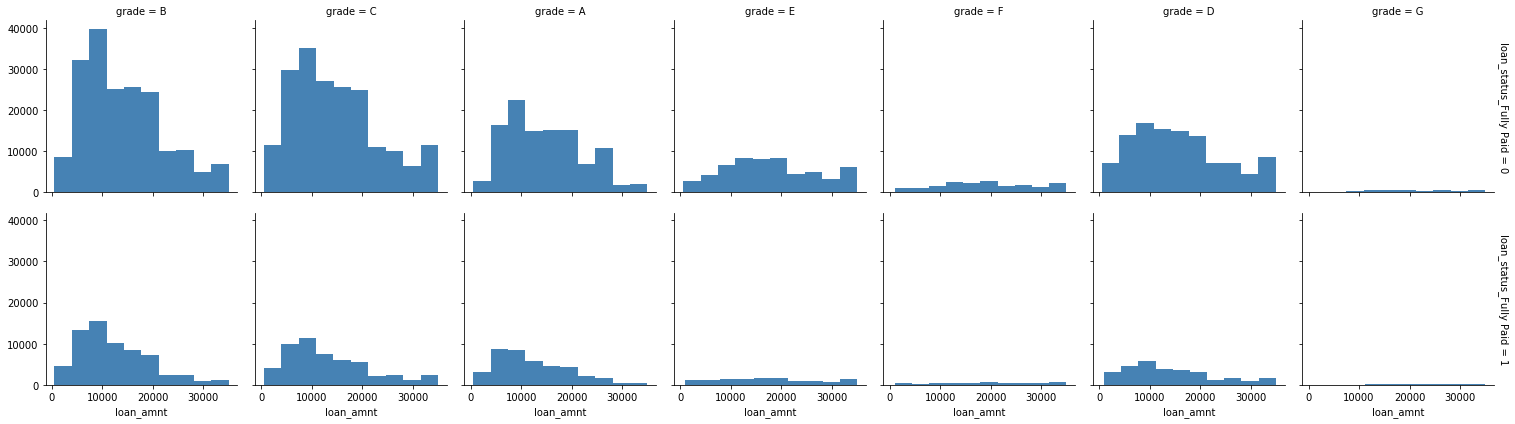

In [197]:
#View relationships between fully paid loans, grade and loan_amnt
g = sns.FacetGrid(data_2, row="loan_status_Fully Paid", col="grade", margin_titles=True)
g.map(plt.hist, "loan_amnt", color="steelblue")

Not a lot of useful information readily visible here, although it does seem like there are more loans paid off that were given higher grades (A, B, or C) than lower grades

C:\Users\Public\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'Fully Paid'),
 Text(0,0,'Charged Off'),
 Text(0,0,'Fully Paid'),
 Text(0,0,'Fully Paid'),
 Text(0,0,'Current'),
 Text(0,0,'Fully Paid'),
 Text(0,0,'Current'),
 Text(0,0,'Fully Paid'),
 Text(0,0,'Charged Off'),
 Text(0,0,'Charged Off')]

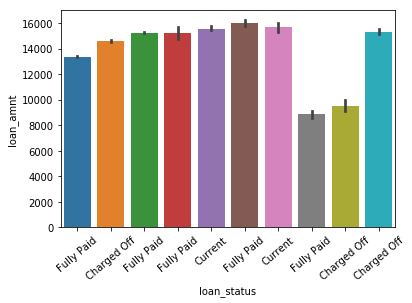

In [198]:
f = sns.barplot(data_2.loan_status, data_2.loan_amnt)
f.set_xticklabels(rotation=40, labels=data_2.loan_status)

There seems to be a relationship between the size of the loan and whether or not it has been fully paid off or charged off

C:\Users\Public\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0,'Fully Paid'),
 Text(0,0,'Charged Off'),
 Text(0,0,'Fully Paid'),
 Text(0,0,'Fully Paid'),
 Text(0,0,'Current'),
 Text(0,0,'Fully Paid'),
 Text(0,0,'Current'),
 Text(0,0,'Fully Paid'),
 Text(0,0,'Charged Off'),
 Text(0,0,'Charged Off')]

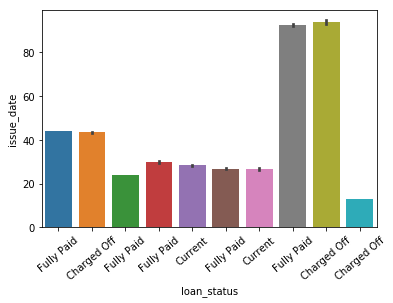

In [199]:
#Show relationship between issue date and loan_status
e = sns.barplot(data_2.loan_status, data_4.issue_date)
e.set_xticklabels(rotation=40, labels=data_2.loan_status)

Clear relationship between the time passed since loan was taken out and whether or not the loan was fully paid or charged off

In [200]:
#Show relationship between grade and loan status
data_11 = data_10.groupby(["loan_status_Fully Paid", "grade_A"]).size().reset_index(name="A_count")
A_percent = (data_11['A_count'].iloc[3]/(data_11['A_count'].iloc[3]+data_11['A_count'].iloc[1]))*100
data_12 = data_10.groupby(["loan_status_Fully Paid", "grade_B"]).size().reset_index(name="B_count")
B_percent = (data_12['B_count'].iloc[3]/(data_12['B_count'].iloc[3]+data_12['B_count'].iloc[1]))*100
data_13 = data_10.groupby(["loan_status_Fully Paid", "grade_C"]).size().reset_index(name="C_count")
C_percent = (data_13['C_count'].iloc[3]/(data_13['C_count'].iloc[3]+data_13['C_count'].iloc[1]))*100
data_14 = data_10.groupby(["loan_status_Fully Paid", "grade_D"]).size().reset_index(name="D_count")
D_percent = (data_14['D_count'].iloc[3]/(data_14['D_count'].iloc[3]+data_14['D_count'].iloc[1]))*100
data_15 = data_10.groupby(["loan_status_Fully Paid", "grade_E"]).size().reset_index(name="E_count")
E_percent = (data_15['E_count'].iloc[3]/(data_15['E_count'].iloc[3]+data_15['E_count'].iloc[1]))*100
data_16 = data_10.groupby(["loan_status_Fully Paid", "grade_F"]).size().reset_index(name="F_count")
F_percent = (data_16['F_count'].iloc[3]/(data_16['F_count'].iloc[3]+data_16['F_count'].iloc[1]))*100
data_17 = data_10.groupby(["loan_status_Fully Paid", "grade_G"]).size().reset_index(name="G_count")
G_percent = (data_17['G_count'].iloc[3]/(data_17['G_count'].iloc[3]+data_17['G_count'].iloc[1]))*100
percentages = ['A_percent', 'B_percent', 'C_percent', 'D_percent', 'E_percent', 'F_percent', 'G_percent']

In [201]:
print(A_percent)
print(B_percent)
print(C_percent)
print(D_percent)
print(E_percent)
print(F_percent)
print(G_percent)

18.432145357153725
20.97999776511342
18.17116263780941
18.31972893885723
15.729823599305364
18.344794877875266
18.664454583160513


No clear relationship between grade and whether or not the loan was fully paid, although B grades seem to be more likely to fully repay and E grades seem to be less likely

## Modeling

In [202]:
#Change loan status variables from dummy variables to one variable with numbers instead of words
new_loan_status = []
for name in data_18['loan_status']:
    if name == 'Charged Off':
        q = name.replace(name, '0')
        new_loan_status.append(q)
    elif name == 'Current':
        q = name.replace(name, '1')
        new_loan_status.append(q)
    elif name == 'Default':
        q = name.replace(name, '2')
        new_loan_status.append(q)
    elif name == 'Does not meet the credit policy. Status:Charged Off':
        q = name.replace(name, '3')
        new_loan_status.append(q)
    elif name == 'Does not meet the credit policy. Status:Fully Paid':
        q = name.replace(name, '4')
        new_loan_status.append(q)
    elif name == 'Fully Paid':
        q = name.replace(name, '5')
        new_loan_status.append(q)
    elif name == 'In Grace Period':
        q = name.replace(name, '6')
        new_loan_status.append(q)
    elif name == 'Issued':
        q = name.replace(name, '7')
        new_loan_status.append(q)
    elif name == 'Late (16-30 days)':
        q = name.replace(name, '8')
        new_loan_status.append(q)
    elif name == 'Late (31-120 days)':
        q = name.replace(name, '9')
        new_loan_status.append(q)
    else:
        print("error")

In [203]:
data_18['new_loan_status'] = np.asarray(new_loan_status)
data_19 = data_18.drop(['loan_status'], axis=1)

In [204]:
#Split the data into test and train sets to test the model with loan status as the predicted value
train_x, test_x, train_y, test_y = train_test_split(data_19[data_19.columns], data_19['new_loan_status'], test_size=0.33, random_state=42)

In [205]:
#Create a simple random forest model and fit it to the train split
model = RandomForestRegressor()
model.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [206]:
#Check the RMSE of the train and test data to check for model accuracy
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)
print("Train RMSE {}".format(np.sqrt(mean_squared_error(train_y, train_predict))))
print("Test RMSE {}".format(np.sqrt(mean_squared_error(test_y, test_predict))))

Train RMSE 0.0
Test RMSE 0.0


The Random Forest Regressor seemed to have worked, but is clearly overfitting the data far too much

In [208]:
data_20 = data_19.drop(['new_loan_status'], axis=1)
model.fit(data_20, data_19.new_loan_status)
final = model.predict(data_20)
submit_1 = pd.DataFrame({'id': data_20.id, 'loan_status': final})